## 模板匹配
**cv2.matchTemplate()， cv2.minMaxLoc()**
如果输入图像的大小是（WxH），模板的大小是（wxh），输出的结果
的大小就是（W-w+1， H-h+1）。当你得到这幅图之后，就可以使用函数
cv2.minMaxLoc() 来找到其中的最小值和最大值的位置了。第一个值为矩
形左上角的点（位置），（w， h）为模板矩形的宽和高。这个矩形就是
找到的模板区域了。  
**如果你使用的比较方法是 cv2.TM_SQDIFF， 最小值对应的位置才是匹
配的区域。**

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
ori_img = cv2.imread('../images/face_back.jpg')
ori_template = cv2.imread('../images/face.jpg')
gray_img=cv2.cvtColor(ori_img ,cv2.COLOR_BGR2GRAY)
gray_template=cv2.cvtColor(ori_template ,cv2.COLOR_BGR2GRAY)
img2 = gray_img.copy()
w, h = template.shape[::-1]

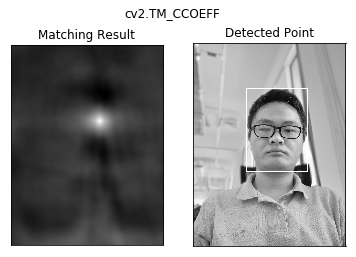

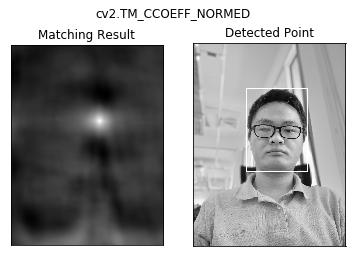

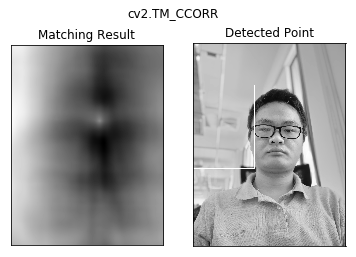

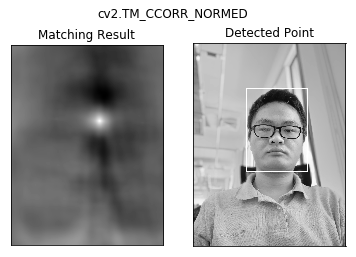

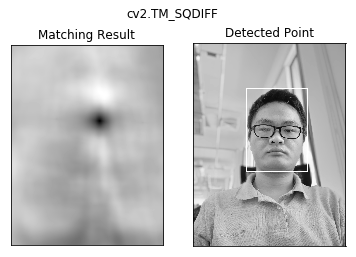

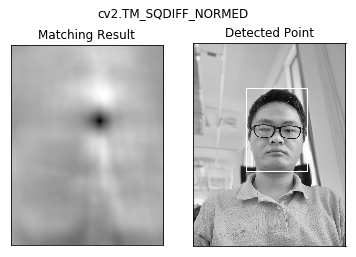

In [18]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    #exec 语句用来执行储存在字符串或文件中的 Python 语句。
    # 例如，我们可以在运行时生成一个包含 Python 代码的字符串，然后使用 exec 语句执行这些语句。
    #eval 语句用来计算存储在字符串中的有效 Python 表达式
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # 使用不同的比较方法，对结果的解释不同
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 20)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Hough 直线变换
如果你要检测的形状可以用数学表达式写出，你就可以是使用霍夫变换检测它。即使要检测的形状存在一点破坏或者扭曲也可以使用  
**cv2.HoughLines()** 在进行霍夫变换之前要首先进行二值化，或者进行Canny 边缘检测。

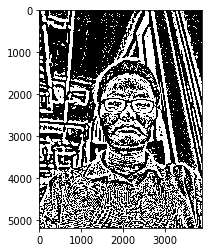

In [152]:
th_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,201,0)
plt.imshow(th_img,'gray')

In [183]:
d=4400
lines = cv2.HoughLines(th_img ,1,np.pi/180,d) # p精确到1px, 角度精确到 pi/180 (1度，有180列)只有累积高于200 px才算一条直线

timg=ori_img.copy()
lines1 = lines[:,0,:]
for rho,theta in lines1[:]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + d*(-b)/2) # 所画的线段长度为1000 px,因为 lines 只返回 rho, theta, 我们不知道直线的长度，所以就选择1000 px 表明直线位置
    y1 = int(y0 + d*(a)/2)
    x2 = int(x0 - d*(-b)/2)
    y2 = int(y0 - d*(a)/2)
    cv2.line(timg,(x1,y1),(x2,y2),(0,0,255),5)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)# 默认值是cv2.WINDOW_AUTOSIZE
cv2.imshow('image',timg) # 这里的title需要与之前创建的窗口名字一致，不然会再新建一个窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Probabilistic Hough Transform
从一幅图像中随机选取一个点集进行计算  
总点数少了，阈值也需要减少  
• minLineLength - 线的最短长度。比这个短的线都会被忽略。  
• MaxLineGap - 两条线段之间的最大间隔，如果小于此值，这两条直线就被看成是一条直线。

函数的返回值就是直线的起点和终点

In [189]:
timg=ori_img.copy()
minLineLength = 2000 # < 500 px 忽略
maxLineGap = 500  # 线段之间距离 < 100 为 一条线段
lines = cv2.HoughLinesP(th_img,1,np.pi/180,2000,minLineLength,maxLineGap) # > 1000 px才被接收
lines1 = lines[:,0,:]
for x1,y1,x2,y2 in lines1[:]:
    cv2.line(timg,(x1,y1),(x2,y2),(0,255,0),2)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)# 默认值是cv2.WINDOW_AUTOSIZE
cv2.imshow('image',timg) # 这里的title需要与之前创建的窗口名字一致，不然会再新建一个窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

## Hough 圆环变换
** cv2.HoughCircles()**

In [243]:
cimg = cv2.imread('../images/corns.jpg')
img = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,40,param1=500,param2=28,minRadius=10,maxRadius=200)
# 圆之间最小距离=40px canny 上限500 ，下限250 大于 28 px在圆里才算， 最小半径10， 最大半径 200
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.namedWindow('detected circles',cv2.WINDOW_NORMAL)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Python: cv2.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)
#Parameters:
#image – 8-bit, single-channel, grayscale input image.
# 返回结果为 Output vector of found circles. Each vector is encoded as a
#3-element floating-point vector (x, y, radius) .
#circle_storage – In C function this is a memory storage that will contain
#the output sequence of found circles.
#method – Detection method to use. Currently, the only implemented method is
#CV_HOUGH_GRADIENT , which is basically 21HT , described in [Yuen90].
#dp – Inverse ratio of the accumulator resolution to the image resolution.
#For example, if dp=1 , the accumulator has the same resolution as the input image.
#If dp=2 , the accumulator has half as big width and height.
#minDist – Minimum distance between the centers of the detected circles.
#If the parameter is too small, multiple neighbor circles may be falsely
#detected in addition to a true one. If it is too large, some circles may be missed.
#param1 – First method-specific parameter. In case of CV_HOUGH_GRADIENT ,
#it is the higher threshold of the two passed to the Canny() edge detector
# (the lower one is twice smaller).
#param2 – Second method-specific parameter. In case of CV_HOUGH_GRADIENT ,
# it is the accumulator threshold for the circle centers at the detection stage.
#The smaller it is, the more false circles may be detected. Circles,
# corresponding to the larger accumulator values, will be returned first.
#minRadius – Minimum circle radius.
#maxRadius – Maximum circle radius.

## 图像特征提取与描述
### Harris 角点检测
**cv2.cornerHarris(np.float32(img),blocksize, Sobel_ksize, k[0.04,0.06])**

In [256]:
help(cv2.dilate)

Help on built-in function dilate:

dilate(...)
    dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
    .   @brief Dilates an image by using a specific structuring element.
    .   
    .   The function dilates the source image using the specified structuring element that determines the
    .   shape of a pixel neighborhood over which the maximum is taken:
    .   \f[\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')\f]
    .   
    .   The function supports the in-place mode. Dilation can be applied several ( iterations ) times. In
    .   case of multi-channel images, each channel is processed independently.
    .   
    .   @param src input image; the number of channels can be arbitrary, but the depth should be one of
    .   CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param kernel structuring element used for dilation; if elem